In [65]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from datetime import date, datetime, timedelta
import pytz
import seaborn as sns
from itertools import combinations

In [32]:
stock_list = ['AAPL', 'MSFT', 'GOOG','AMZN']
start_date, end_date = '2010-01-01', '2022-12-31'

In [33]:
#functions to source new data
def get_stock_data(ticker,start_date,end_date):
    stock_data = yf.Ticker(ticker).history(start=start_date,end=end_date).reset_index()
    return stock_data

def get_sp500(start_date,end_date):
    sp500_data = yf.Ticker("^GSPC").history(start=start_date, end=end_date).reset_index()
    return sp500_data

In [34]:
#preprocessing, to be deleted maybe
class DataProcessing:
    def __init__(self, data):
        for column in data.columns:
            setattr(self,column.lower(),np.array(data[column]))

    def gen_train_test(self,train_percent_len):
        self.Y_train = self.close[0:round(train_percent_len*(len(self.close)))]
        self.X_train = self.date[0:round(train_percent_len*(len(self.date)))]
        self.Y_test = self.close[round(train_percent_len*(len(self.close))):len(self.close)]
        self.X_test = self.date[round(train_percent_len*(len(self.date))):len(self.date)]

        return self.X_train, self.Y_train, self.X_test, self.Y_test

In [37]:
#ingest data
stock_dict = {}
ma_day = [20,50,100]
for stock in stock_list:
    get_stock_data(stock, start_date, end_date).to_csv(stock + ".csv",index=False) #uncomment to get new data
    stock_dict[stock] = pd.read_csv(stock + ".csv")
    stock_dict[stock]['Date'] = stock_dict[stock]['Date'].apply(lambda x: datetime.fromisoformat(x).astimezone(pytz.utc))
    stock_dict[stock]['Ticker'] = stock
    
    #calculated moving average stock prices
    for ma in ma_day:
        var_name = f"{ma}-day MA Close"
        stock_dict[stock][var_name] = stock_dict[stock]['Close'].rolling(ma).mean()
        
    #calculate daily percentage change (i.e., daily return)
    stock_dict[stock]['Daily Return'] = stock_dict[stock]['Close'].pct_change()
    

In [38]:
stock_dict['AAPL'].head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,20-day MA Close,50-day MA Close,100-day MA Close,Daily Return
0,2010-01-04 05:00:00+00:00,6.478689,6.511168,6.446816,6.496294,493729600,0.0,0.0,AAPL,NaN,NaN,NaN,NaN
1,2010-01-05 05:00:00+00:00,6.514204,6.544256,6.473224,6.507526,601904800,0.0,0.0,AAPL,NaN,NaN,NaN,0.001729
2,2010-01-06 05:00:00+00:00,6.507525,6.533327,6.397336,6.404014,552160000,0.0,0.0,AAPL,NaN,NaN,NaN,-0.015906
3,2010-01-07 05:00:00+00:00,6.427693,6.435281,6.345733,6.392177,477131200,0.0,0.0,AAPL,NaN,NaN,NaN,-0.001848
4,2010-01-08 05:00:00+00:00,6.383677,6.435281,6.346037,6.434673,447610800,0.0,0.0,AAPL,NaN,NaN,NaN,0.006648


In [39]:
stock_dict['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Date              3272 non-null   datetime64[ns, UTC]
 1   Open              3272 non-null   float64            
 2   High              3272 non-null   float64            
 3   Low               3272 non-null   float64            
 4   Close             3272 non-null   float64            
 5   Volume            3272 non-null   int64              
 6   Dividends         3272 non-null   float64            
 7   Stock Splits      3272 non-null   float64            
 8   Ticker            3272 non-null   object             
 9   20-day MA Close   3253 non-null   float64            
 10  50-day MA Close   3223 non-null   float64            
 11  100-day MA Close  3173 non-null   float64            
 12  Daily Return      3271 non-null   float64            
dtypes: 

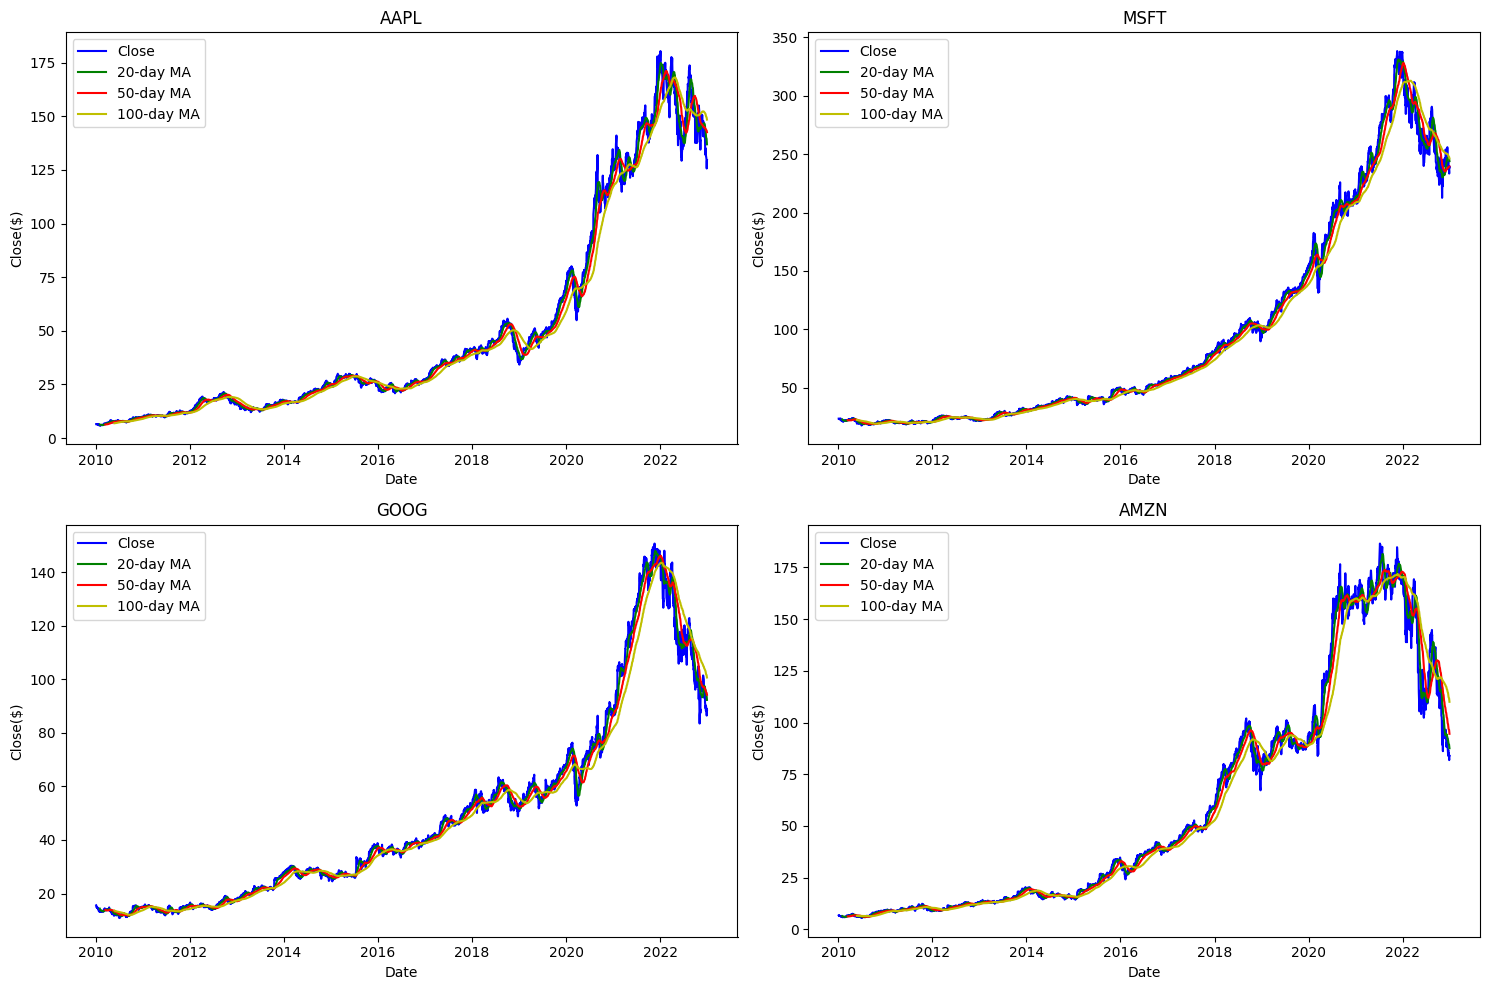

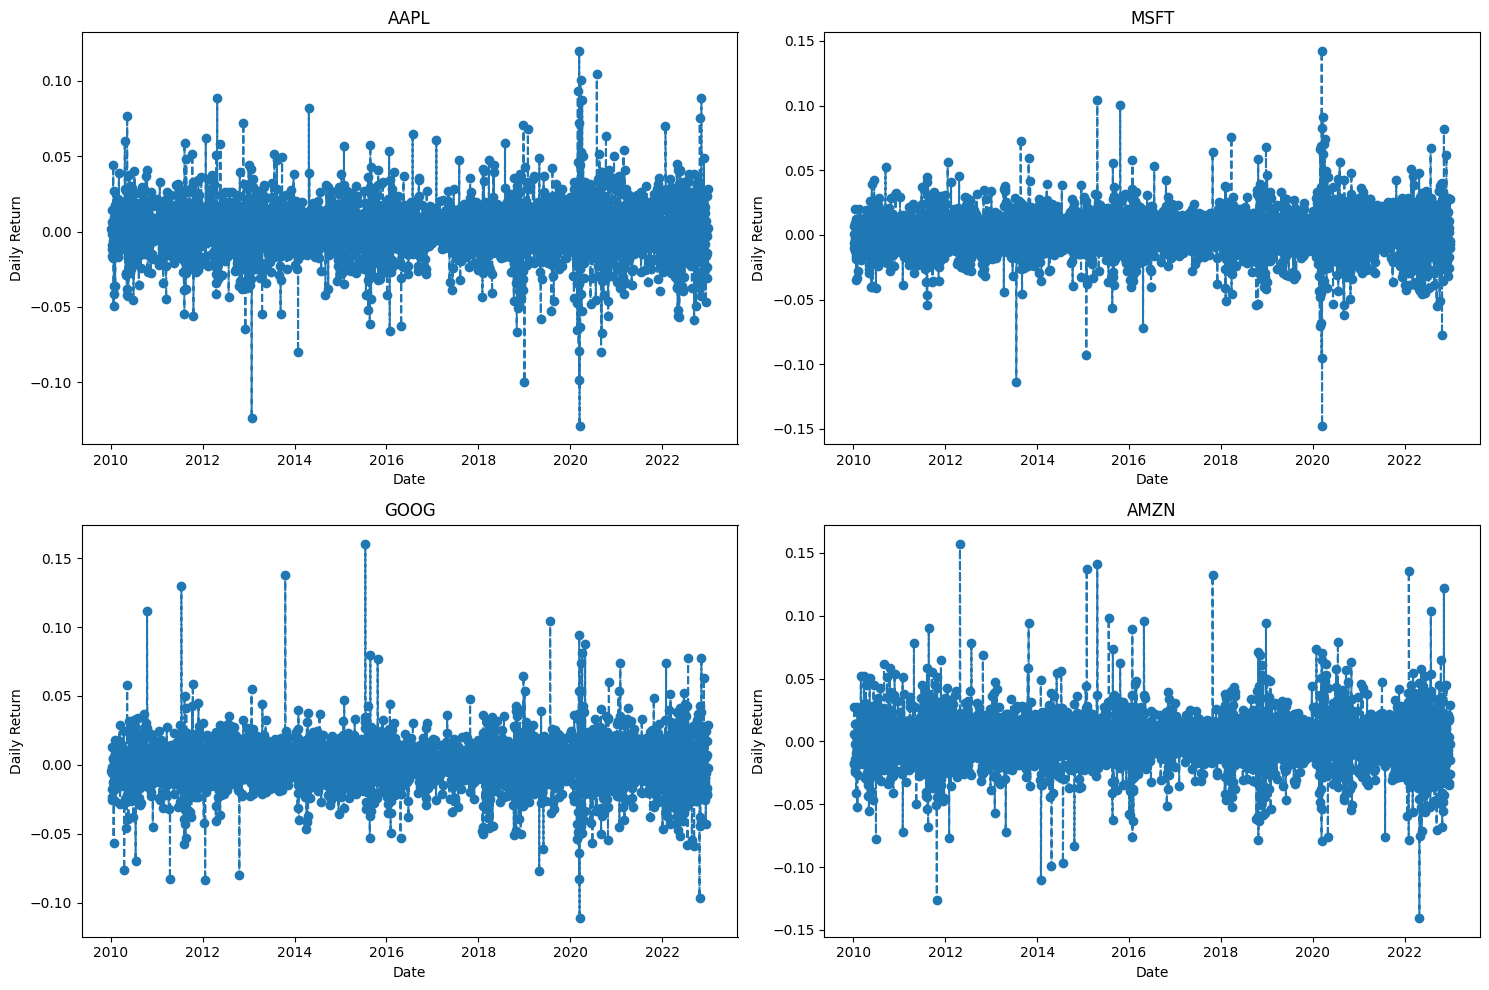

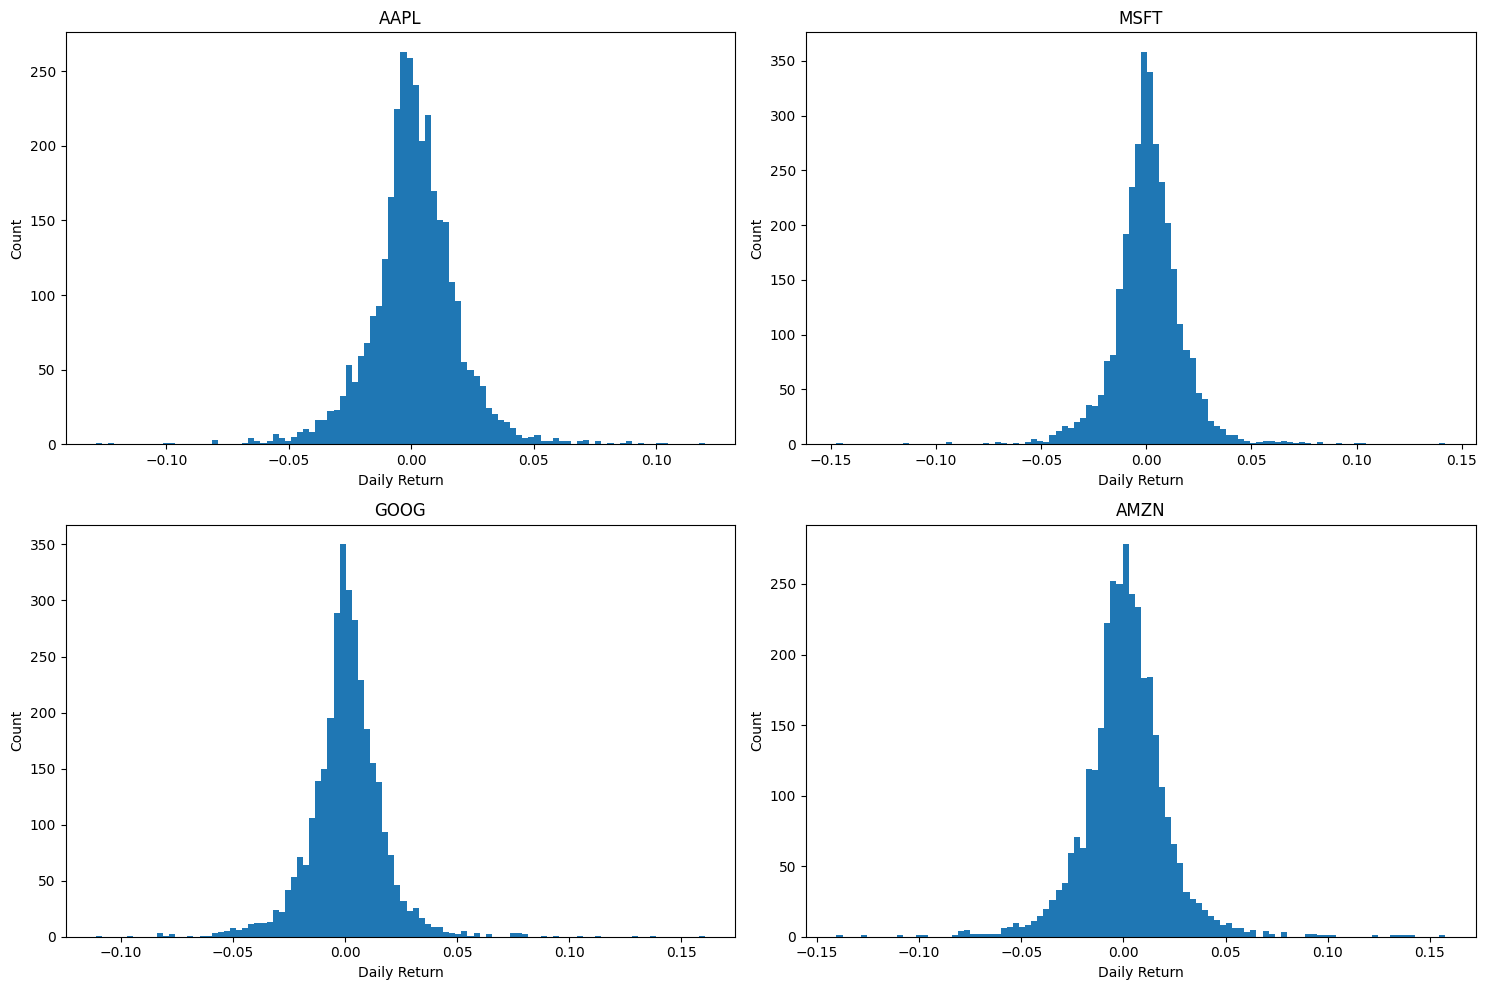

In [40]:
#plot stock close and  moving average (20, 50, 100-day) close price

fig, axs = plt.subplots(math.ceil(len(stock_dict)/2),2, figsize = (15,10))    

for i, stock in enumerate(stock_list):
    ax = axs[i//2, math.ceil(i/2)-i//2]
    ticker = stock_dict[stock]
    
    ax.plot(ticker['Date'],ticker['Close'], color = 'b', label = 'Close') #plot close
    ax.plot(ticker['Date'],ticker['20-day MA Close'], color = 'g', label = '20-day MA') #plot 10-day MA
    ax.plot(ticker['Date'],ticker['50-day MA Close'], color = 'r', label = '50-day MA') #plot 20-day MA
    ax.plot(ticker['Date'],ticker['100-day MA Close'], color = 'y', label = '100-day MA')#plot 50-day MA
    ax.legend(loc='best')
    
    ax.set_ylabel('Close($)')
    ax.set_xlabel('Date')
    ax.set_title(f"{stock}")
    
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(math.ceil(len(stock_dict)/2),2, figsize = (15,10))

for i, stock in enumerate(stock_list):
    ax = axs[i//2, math.ceil(i/2)-i//2]
    ticker = stock_dict[stock]
    
    ax.plot(ticker['Date'],ticker['Daily Return'], marker='o', linestyle = '--',)
    ax.set_ylabel('Daily Return')
    ax.set_xlabel('Date')
    ax.set_title(f"{stock}")

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(math.ceil(len(stock_dict)/2),2, figsize = (15,10))

for i, stock in enumerate(stock_list):
    ax = axs[i//2, math.ceil(i/2)-i//2]
    ticker = stock_dict[stock]
    
    ax.hist(ticker['Daily Return'],bins=100)
    ax.set_ylabel('Count')
    ax.set_xlabel('Daily Return')
    ax.set_title(f"{stock}")
    
plt.tight_layout()
plt.show()

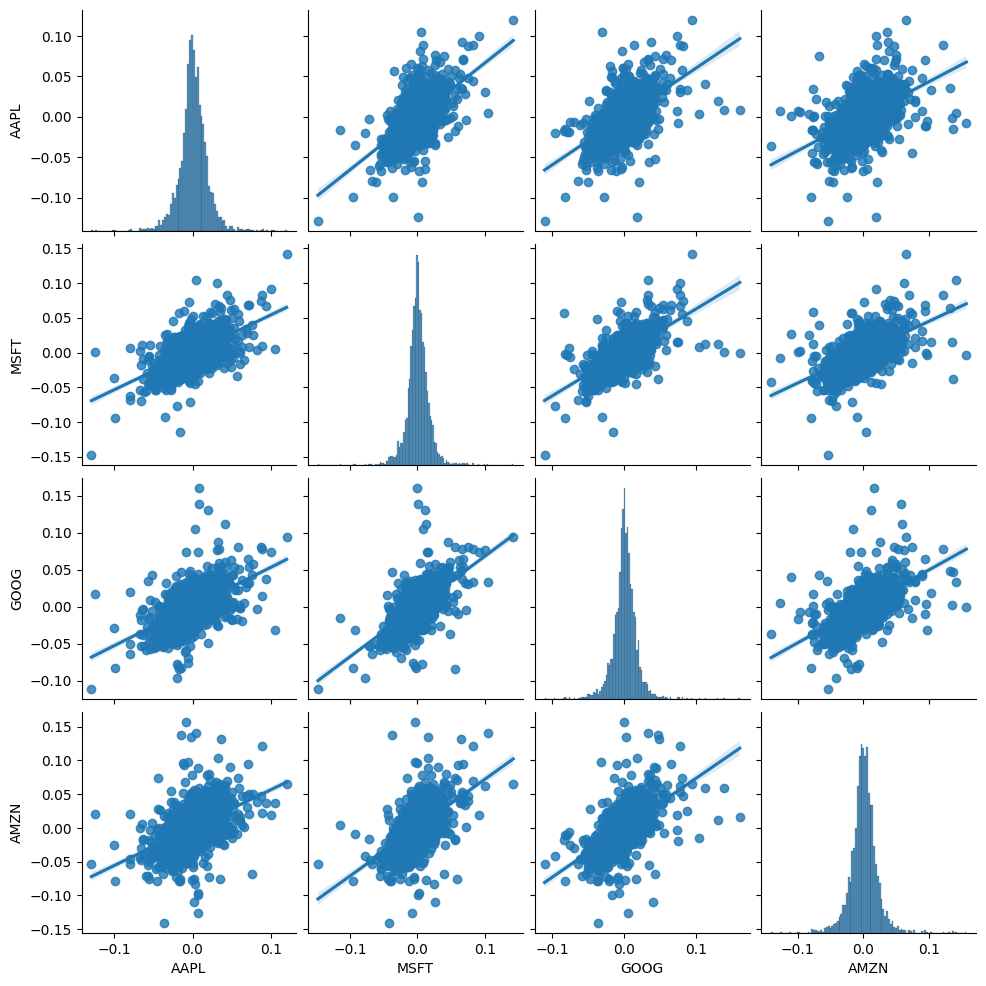

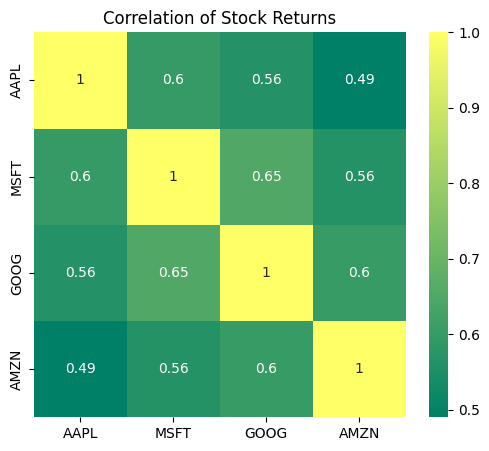

In [123]:
#analyze correlation betweeen stock returns
returns_df = [stock_dict[stock][['Ticker','Date','Daily Return']].rename(columns={'Daily Return':stock}).drop(columns='Ticker').set_index('Date') for stock in stock_dict]
returns_df = pd.concat(returns_df, axis=1)
sns.pairplot(returns_df, kind='reg')

plt.figure(figsize = (6,5))
sns.heatmap(returns_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')
plt.show()

    
